# Linear Regression

- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

<img src="img/lin.png" style="height:300px">

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable # import variable from pytorch library    
import torch.nn as nn # neural network

import warnings
warnings.filterwarnings("ignore")

## 1-Create Dataset

In [2]:
# lets define car prices
car_prices_list = [3,4,5,6,7,8,9] # As a car company we collect this data from previous selling
type(car_prices_list)

list

In [3]:
car_price_np = np.array(car_prices_list, dtype=np.float32)
car_price_np.shape

(7,)

In [4]:
car_price_np = car_price_np.reshape(-1, 1)
car_price_np.shape

(7, 1)

In [5]:
car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor.shape

torch.Size([7, 1])

In [6]:
# lets define number of car sell
number_of_car_sell_list= [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_list,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

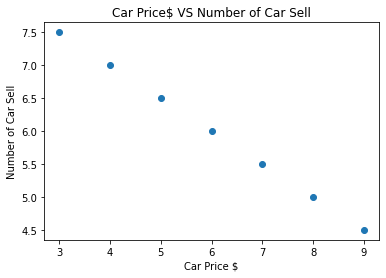

In [7]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_list, number_of_car_sell_list)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction
- Lets implement it with Pytorch

<img src="img/lin2.png" style="height:400px">

## 2-Create Model

In [8]:
# 1- create class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size): # lr'ye input_size ve output_sizep parametreleri import edilir.
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression, self).__init__() # inherit modules.
        # Linear function.
        self.linear = nn.Linear(input_dim, output_dim) # boş bir linear function tanımlanır.

    def forward(self, x):
        return self.linear(x) # return f(X) = y
    
# 2- define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) # input and output size are 1

# 3-Create MSE
mse = nn.MSELoss()

# 4-Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() # weight ve bias 0'a eşitlenir başlangıçta
    
    # Forward to get output
    predicts = model(car_price_tensor) # y=f(x) değerleri
    
    # Calculate Loss
    loss = mse(predicts, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward() # türev
    
    # Updating parameters
    optimizer.step() # gradientler güncellenir
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0): # çok sık print görmek istemiyoruz
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 127.56163024902344
epoch 50, loss 5.832703590393066
epoch 100, loss 3.9414024353027344
epoch 150, loss 2.6633713245391846
epoch 200, loss 1.7997512817382812
epoch 250, loss 1.2161680459976196
epoch 300, loss 0.8218161463737488
epoch 350, loss 0.5553357005119324
epoch 400, loss 0.37526383996009827
epoch 450, loss 0.25358137488365173
epoch 500, loss 0.17135557532310486
epoch 550, loss 0.11579211801290512
epoch 600, loss 0.07824598252773285
epoch 650, loss 0.052873820066452026
epoch 700, loss 0.0357290580868721
epoch 750, loss 0.024143680930137634
epoch 800, loss 0.016314884647727013
epoch 850, loss 0.011024713516235352
epoch 900, loss 0.007449910510331392
epoch 950, loss 0.005034258123487234
epoch 1000, loss 0.003401833353564143


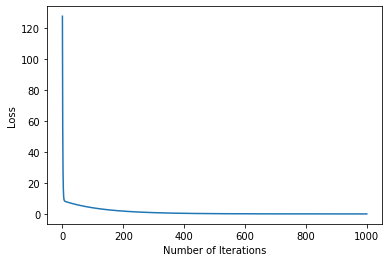

In [9]:
plt.plot(range(iteration_number), loss_list) 
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

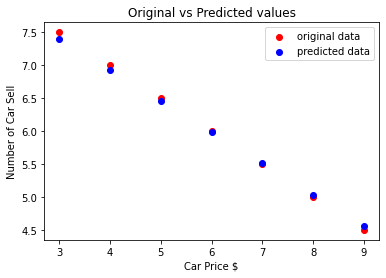

In [10]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_list, number_of_car_sell_list, label = "original data",color ="red")
plt.scatter(car_prices_list, predicted, label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show() # loss sayısı azaldığı zaman noktalar üst üste oturacaktır.